In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [19]:
# Let's start off by assuming that there's a CSV file with some data
# that we unpack into some variables below

# Data from OpenFlights regarding all international routes
airlineCode, airlineID, source, sourceID, destination, destinationID, codeshare, stops, equipment = np.loadtxt("../data/routes.csv",delimiter=",",unpack=True,dtype='U')

# Data from OpenFlights regarding all international Airports amd their associated cities
ap_city,ap_country,iata,icao = np.loadtxt("../data/airports.csv",delimiter=",",usecols=[2,3,4,5],unpack=True,dtype='U')

ind_airports_iata = iata[(ap_country=='"India"')]  # List of all Indian airports

# Replace all quotation marks in the collected data
ind_airports_iata = [w.replace('"', '') for w in ind_airports_iata]
ap_city = [w.replace('"', '') for w in ap_city]
ap_country = [w.replace('"', '') for w in ap_country]
iata = [w.replace('"', '') for w in iata]
icao = [w.replace('"', '') for w in icao]


# List of all indian airports
ind_airports = ["DEL", "BOM","MAA","BLR","CCU","HYD","COK"]

# Foreign flights arriving to an Indian airport (may contain duplicates i.e. two flights or more from the same aiport)
origins_with_dup = []

for ap in ind_airports:
    all_origins_to_i = source[(destination==ap)] # Find all flights to an Indian airport i
    
    for o in all_origins_to_i:                   # For each of these flights,
        if(o not in ind_airports_iata):          # If the airport is not in India (i.e. "foreign")
            for i in range(0,len(iata)):         # Append the origin city and country to the origins_with_dup list
                if(o==iata[i]):
                    origins_with_dup.append([airlineCode[i],o,ap_city[i],ap_country[i]])
                    break;
            
origins_with_dup=np.array(origins_with_dup)



['5J' '5J' '9K' '5U' '7S' '7J' '5T' '9K' '3G' '7R' '5N' 'AA' '5U' '7R'
 '7S' '8L' '3M' '8L' '3M' '4U' '4O' '5T' '3M' '9K' '4U' '7P' '7R' '5N'
 '5U' '3H' '7R' '9M' 'AB' '5N' '9E' '5J' '7S' '3M' '5U' '8L' '3U' '3H'
 '6E' '9K' '8P' '5P' '8L' '8L' '4U' '4U' '3L' '5T' '4U' '6E' '3M' '7R'
 '8L' '4U' '6E' '7R' '8L' '5U' '4O' '5T' '7R' '5J' '5J' '5U' '8L' '5J'
 '7J' '6E' '7S' '7H' '3R' '9R' '5T' '3H' '3H' '4U' '8L' '7P' '3U' '8P'
 '6E' '8L' '4U' '7R' '9M' '5Z' '6E' 'AA' '5T' '5J' '5U' '5J' '7S' '3G'
 '8L' '7J' '5N' '5N' '5P' '7J' '9K' 'AB' '8R' '7P' '3M' '9W' '5U' '5U'
 '5U' '5T' '5J' '9K' '3G' '7P' '7R' '5N' 'AA' '5U' '7R' '5N' '3U' '7S'
 '8L' '5T' '3M' '5U' '9R' '6E' '5P' '8L' '3M' '4U' '4O' '5T' '9K' '4O'
 '7P' '5U' '8R' '3H' 'AB' '5N' '3U' '3M' '5U' '3U' '3H' '5P' '4U' '5T'
 '3M' '8M' '7R' '3R' '5U' '4O' '5T' '7R' '5U' '8L' '5J' '9W' 'AA' '9N'
 '9M' '3R' '9R' '5T' '3H' '3H' '4U' '4U' '8L' '7P' '3U' '4O' '9K' '6E'
 '8L' '9K' '5Z' 'AA' '5T' '3U' '3G' '8L' '5N' '5N' '5P' '9K' 'AB' '8R'
 '7P' 

(array([ 17,  46,  68,  98, 133, 163, 189, 200, 203, 209, 217, 223, 229,
        234, 255, 259, 264, 274, 281, 282, 287, 303, 305, 309, 330, 336,
        339]),)

In [10]:
origins, o_num_dup = np.unique(origins_with_dup, return_counts=True, axis=0) # Get unique origins, with number of duplicates

origins = np.insert(origins,0,np.array(o_num_dup),axis=1)  # Add number to duplicates to array

#print(origins_with_dup[:,1])
#print(origins_with_dup[np.where(origins_with_dup[:,1]=="Singapore")])

I'm now going to make a list of number of flights per city (not a problem in this case, since it seems that every city only appears once, but in principle it could be important).

In [148]:
cityList = origins[:,2]

#cityList = np.insert(cityList,1,"Karachi")

if(len(np.unique(cityList))!=len(cityList)):
    #run remove duplicate origin cities code
    
    print("Duplicate cities exist")

# We now need just the cities and the flights out of those cities to Indian airports

no_of_flts = origins[:,0]

print(origins)

Duplicate cities exist
[['4' 'ADD' 'Addis Ababa' 'Ethiopia']
 ['1' 'ADE' 'Aden' 'Yemen']
 ['1' 'ALA' 'Alma-ata' 'Kazakhstan']
 ['2' 'AMM' 'Amman' 'Jordan']
 ['3' 'AMS' 'Amsterdam' 'Netherlands']
 ['1' 'ASB' 'Ashkhabad' 'Turkmenistan']
 ['19' 'AUH' 'Abu Dhabi' 'United Arab Emirates']
 ['5' 'BAH' 'Bahrain' 'Bahrain']
 ['1' 'BHX' 'Birmingham' 'United Kingdom']
 ['15' 'BKK' 'Bangkok' 'Thailand']
 ['4' 'BRU' 'Brussels' 'Belgium']
 ['2' 'CAI' 'Cairo' 'Egypt']
 ['1' 'CAN' 'Guangzhou' 'China']
 ['4' 'CDG' 'Paris' 'France']
 ['2' 'CGP' 'Chittagong' 'Bangladesh']
 ['15' 'CMB' 'Colombo' 'Sri Lanka']
 ['1' 'CTU' 'Chengdu' 'China']
 ['10' 'DAC' 'Dhaka' 'Bangladesh']
 ['1' 'DMK' 'Bangkok' 'Thailand']
 ['10' 'DMM' 'Dammam' 'Saudi Arabia']
 ['11' 'DOH' 'Doha' 'Qatar']
 ['20' 'DXB' 'Dubai' 'United Arab Emirates']
 ['1' 'DYU' 'Dushanbe' 'Tajikistan']
 ['3' 'EWR' 'Newark' 'United States']
 ['2' 'FCO' 'Rome' 'Italy']
 ['8' 'FRA' 'Frankfurt' 'Germany']
 ['1' 'HEA' 'Herat' 'Afghanistan']
 ['1' 'HEL' 'Helsin

### Estimating $D_{ij} (t)$

We now have a list of all the flights per airport $i$, and from which countries they come, per day. The problem right now is that we have the same data for every day.

This essentially gives us $D_{ij}$, since the number of passengers in a day from an airport will be `no. of flights from airport j x average number of people per flight (200?)`.

**Note:** D_{ij}(t) is a *constant* without daily data.

I now have two arrays, one with a list of cities and the other with the number of flights from that city,


### What about $p_j(t)$

Let's start off by assuming some random-ish value of $p_j(t)$. It should clearly be indexed by city.

In [145]:
# This assumes that pj.csv has no duplicate city-names

pj_city,pj_country,pj = np.loadtxt("../data/pj.csv",delimiter=",",usecols=[0,1,2],unpack=True,dtype='U')

# Calculating D_ij x p_j

people_per_flight = 200
Dijpj = 0
total_pass = 0

for n in range(0,len(cityList)):
    index = np.where(pj_city==cityList[n])
    if (len(index)==0):
        print("City name: ___"+city+ "___ not found")
    else:
        #print(no_of_flts[n] + " flights from " + cityList[n] +  " carrying " + str(int(no_of_flts[n])*people_per_flight) + " people. Number of infected individuals is: " + str(int(no_of_flts[n])*people_per_flight*float(pj[index[0][0]])))
        Dijpj = Dijpj + int(no_of_flts[n])*people_per_flight*float(pj[index[0][0]])
        total_pass = total_pass + int(no_of_flts[n])*people_per_flight


print("Total number of infected cases on day t is "+ str(Dijpj)+ " out of a total of "+str(total_pass))

Total number of infected cases on day t is 32370.638131669275 out of a total of 68400


Later code from:
https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/

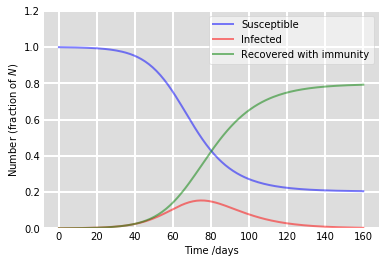

In [133]:
# Total population, N.
N = 2e7
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = Dijpj, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10 
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (fraction of $N$)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()